# Pandas

## shape, columns

## append, drop: axis, inplace

In [1]:
import pandas as pd

In [2]:
# dict
frame = pd.DataFrame({'num':range(10), 'chars':['a']*10})
frame

,num,chars
0,0,a
1,1,a
2,2,a
3,3,a
4,4,a
5,5,a
6,6,a
7,7,a
8,8,a
9,9,a


In [3]:
frame.columns

Index(['num', 'chars'], dtype='object')

In [4]:
frame.shape

(10, 2)

In [5]:
# read from file
frame = pd.read_csv('data.csv', header=0, sep='\t')
frame.shape

(6, 4)

In [6]:
frame['IsStudent'] = [0]*3 + [1]*3
frame

,Name,Birth,City,Position,IsStudent
0,Иванов А.А.,22.03.1980,Москва,NaN,0
1,Сорокин И.В.,07.08.1965,Волгоград,инженер,0
2,Белов М.М.,13.02.1980,Ростов,менеджер,0
3,Мельникова Д.С.,15.04.1985,Ростов,NaN,1
4,Рыбина Е.П.,19.11.1985,Москва,инженер,1
5,Костров С.О.,31.05.1985,Москва,стажер,1


In [7]:
# does not change original frame
frame.drop('Position', axis=1)

,Name,Birth,City,IsStudent
0,Иванов А.А.,22.03.1980,Москва,0
1,Сорокин И.В.,07.08.1965,Волгоград,0
2,Белов М.М.,13.02.1980,Ростов,0
3,Мельникова Д.С.,15.04.1985,Ростов,1
4,Рыбина Е.П.,19.11.1985,Москва,1
5,Костров С.О.,31.05.1985,Москва,1


In [8]:
frame

,Name,Birth,City,Position,IsStudent
0,Иванов А.А.,22.03.1980,Москва,NaN,0
1,Сорокин И.В.,07.08.1965,Волгоград,инженер,0
2,Белов М.М.,13.02.1980,Ростов,менеджер,0
3,Мельникова Д.С.,15.04.1985,Ростов,NaN,1
4,Рыбина Е.П.,19.11.1985,Москва,инженер,1
5,Костров С.О.,31.05.1985,Москва,стажер,1


In [9]:
frame.drop('Position', axis=1, inplace=True)
frame

,Name,Birth,City,IsStudent
0,Иванов А.А.,22.03.1980,Москва,0
1,Сорокин И.В.,07.08.1965,Волгоград,0
2,Белов М.М.,13.02.1980,Ростов,0
3,Мельникова Д.С.,15.04.1985,Ростов,1
4,Рыбина Е.П.,19.11.1985,Москва,1
5,Костров С.О.,31.05.1985,Москва,1


In [10]:
new_line = {'Name':'Petrov', 'Birth':'10.10.2010', 'City':'Moscow'}
frame.append(new_line, ignore_index=True)

,Name,Birth,City,IsStudent
0,Иванов А.А.,22.03.1980,Москва,0.0
1,Сорокин И.В.,07.08.1965,Волгоград,0.0
2,Белов М.М.,13.02.1980,Ростов,0.0
3,Мельникова Д.С.,15.04.1985,Ростов,1.0
4,Рыбина Е.П.,19.11.1985,Москва,1.0
5,Костров С.О.,31.05.1985,Москва,1.0
6,Petrov,10.10.2010,Moscow,NaN


In [11]:
frame.drop([3], axis=0, inplace=True)

In [12]:
frame

,Name,Birth,City,IsStudent
0,Иванов А.А.,22.03.1980,Москва,0
1,Сорокин И.В.,07.08.1965,Волгоград,0
2,Белов М.М.,13.02.1980,Ростов,0
4,Рыбина Е.П.,19.11.1985,Москва,1
5,Костров С.О.,31.05.1985,Москва,1


In [13]:
frame.to_csv('new_data.csv', sep=',', header=True, index=None)

# Pandas
## dtypes, apply(), info(), fillna(''), head(5), 
## df.Name vs df[['']]
## loc[[rows], [cols]] vs iloc[[idx_row], [idx_col]] (any ix[...] no work)
# df[df.Name >= cond]

In [14]:
frame = pd.read_csv('data.csv', header=0, sep='\t')
frame

,Name,Birth,City,Position
0,Иванов А.А.,22.03.1980,Москва,NaN
1,Сорокин И.В.,07.08.1965,Волгоград,инженер
2,Белов М.М.,13.02.1980,Ростов,менеджер
3,Мельникова Д.С.,15.04.1985,Ростов,NaN
4,Рыбина Е.П.,19.11.1985,Москва,инженер
5,Костров С.О.,31.05.1985,Москва,стажер


In [15]:
frame.dtypes

Name        object
Birth       object
City        object
Position    object
dtype: object

In [16]:
frame.Birth = frame.Birth.apply(pd.to_datetime)

In [17]:
frame.dtypes

Name                object
Birth       datetime64[ns]
City                object
Position            object
dtype: object

In [18]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Birth     6 non-null      datetime64[ns]
 2   City      6 non-null      object        
 3   Position  4 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 320.0+ bytes


In [19]:
frame.fillna('part_time_job', inplace=True)

In [20]:
frame

,Name,Birth,City,Position
0,Иванов А.А.,1980-03-22,Москва,part_time_job
1,Сорокин И.В.,1965-07-08,Волгоград,инженер
2,Белов М.М.,1980-02-13,Ростов,менеджер
3,Мельникова Д.С.,1985-04-15,Ростов,part_time_job
4,Рыбина Е.П.,1985-11-19,Москва,инженер
5,Костров С.О.,1985-05-31,Москва,стажер


In [21]:
frame.Position

0    part_time_job
1          инженер
2         менеджер
3    part_time_job
4          инженер
5           стажер
Name: Position, dtype: object

In [22]:
frame[['Position']]

,Position
0,part_time_job
1,инженер
2,менеджер
3,part_time_job
4,инженер
5,стажер


In [23]:
frame.head(3)

,Name,Birth,City,Position
0,Иванов А.А.,1980-03-22,Москва,part_time_job
1,Сорокин И.В.,1965-07-08,Волгоград,инженер
2,Белов М.М.,1980-02-13,Ростов,менеджер


In [24]:
frame.loc[[0, 1, 2], ['Name', 'City']]

,Name,City
0,Иванов А.А.,Москва
1,Сорокин И.В.,Волгоград
2,Белов М.М.,Ростов


In [25]:
frame.iloc[[0, 1, 2],[0, 2]]

,Name,City
0,Иванов А.А.,Москва
1,Сорокин И.В.,Волгоград
2,Белов М.М.,Ростов


In [26]:
frame.ix([0, 1, 2], ['Name', 'City'])

AttributeError: 'DataFrame' object has no attribute 'ix'

In [27]:
frame.ix([0, 1, 2],[0, 2])

AttributeError: 'DataFrame' object has no attribute 'ix'

In [28]:
frame[(frame.Birth <= pd.datetime(1985,1,1)) & (frame.City != 'Москва')]

<ipython-input-28-85cc94266a37>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  frame[(frame.Birth <= pd.datetime(1985,1,1)) & (frame.City != 'Москва')]


,Name,Birth,City,Position
1,Сорокин И.В.,1965-07-08,Волгоград,инженер
2,Белов М.М.,1980-02-13,Ростов,менеджер


In [30]:
frame

,Name,Birth,City,Position
0,Иванов А.А.,1980-03-22,Москва,part_time_job
1,Сорокин И.В.,1965-07-08,Волгоград,инженер
2,Белов М.М.,1980-02-13,Ростов,менеджер
3,Мельникова Д.С.,1985-04-15,Ростов,part_time_job
4,Рыбина Е.П.,1985-11-19,Москва,инженер
5,Костров С.О.,1985-05-31,Москва,стажер


# Numpy
## list vs nparray

In [80]:
import numpy as np

In [82]:
x = [1, 2, 3, 4, 5]
y = np.array(x)

print(type(x), x)
print(type(y), y)

<class 'list'> [1, 2, 3, 4, 5]
<class 'numpy.ndarray'> [1 2 3 4 5]


In [83]:
x[1:3]

[2, 3]

In [84]:
y[1:3]

array([2, 3])

In [86]:
x[[0, 2]]

TypeError: list indices must be integers or slices, not list

In [87]:
y[[0, 2]]

array([1, 3])

In [88]:
y[y>3]

array([4, 5])

In [89]:
x*5

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [90]:
y*5

array([ 5, 10, 15, 20, 25])

In [91]:
x **2 

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [92]:
y ** 2

array([ 1,  4,  9, 16, 25])

In [94]:
matrix = [[1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]
np_mat = np.array(matrix)

In [95]:
matrix[0][1]

2

In [96]:
np_mat[0][1]

2

In [97]:
np_mat[0, 1]

2

In [100]:
np.random.rand()

0.493017257327524

In [103]:
np.random.randn(5)

array([-0.93144317,  0.65539482,  0.91876165,  0.39568563,  0.76377197])

In [104]:
np.arange(0, 8, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
       3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6, 6.9, 7.2, 7.5,
       7.8])

In [105]:
range(0, 8, 0.3)

TypeError: 'float' object cannot be interpreted as an integer

In [107]:
%timeit np.arange(0, 10000)
%timeit range(0, 10000)

7.36 µs ± 221 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
214 ns ± 2.06 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# SciPy
overview

In [108]:
from scipy import optimize

In [111]:
def f(x):
    return (x[0] - 3.0)**2 + (x[1] - 1.0) + 3
x_min = optimize.minimize(f, [5, 5])
x_min

      fun: -3.968724516757227e+100
 hess_inv: array([[4.99999993e-001, 3.48986101e+050],
       [3.48986101e+050, 2.78095268e+101]])
      jac: array([-3.9843316e+50,  1.0000000e+00])
  message: 'Maximum number of iterations has been exceeded.'
     nfev: 1212
      nit: 400
     njev: 404
   status: 1
  success: False
        x: array([-1.99216578e+050, -7.93744903e+100])

In [112]:
x_min.x

array([-1.99216578e+050, -7.93744903e+100])

In [113]:
from scipy import linalg

In [115]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

x = linalg.solve(a, b)
x

array([ 2., -2.,  9.])

In [116]:
np.dot(a, b)

array([14, -2, 19])

# Matplotlib

In [121]:
from matplotlib import pylab as plt

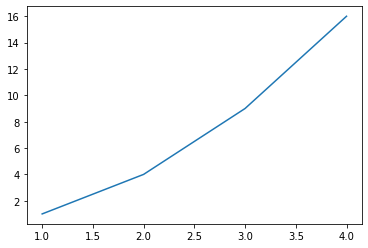

In [124]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

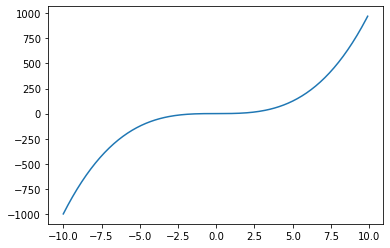

In [126]:
x = np.arange(-10, 10, 0.1)
y = x ** 3

plt.plot(x, y)
plt.show()

# Show all

In [131]:
from scipy import interpolate

In [151]:
x = np.arange(0, 10, 0.5)
y = np.exp(x/3.0) + np.random.randn(len(x))

In [152]:
f = interpolate.interp1d(x, y, kind='linear')
x_new = np.arange(0, 9.5, 0.5)
y_new = f(x_new)

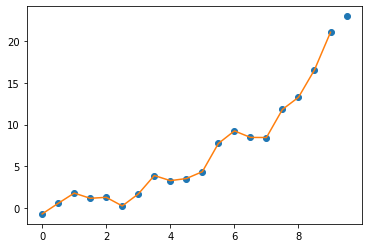

In [153]:
plt.plot(x, y, 'o', x_new, y_new, '-')
plt.show()

In [154]:
np.random.rand(4, 5)

array([[0.66924577, 0.04758708, 0.89933709, 0.03250658, 0.78152965],
       [0.35323256, 0.135514  , 0.60367615, 0.89482546, 0.72179601],
       [0.53828249, 0.08234895, 0.8564316 , 0.87252069, 0.71304571],
       [0.91744299, 0.78099155, 0.05824668, 0.40869418, 0.75674801]])

# SciPy +

In [36]:
from scipy import optimize

In [37]:
# rosenbrock func
def f(x):
    return 0.5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
f([1, 1])

0.0

In [38]:
result = optimize.brute(f, ((-5, 5), (-5, 5)))
result

array([0.99999324, 1.00001283])

In [39]:
optimize.differential_evolution( f, ((-5, 5), (-5, 5)) )

     fun: 7.395570986446986e-32
 message: 'Optimization terminated successfully.'
    nfev: 3333
     nit: 110
 success: True
       x: array([1., 1.])

In [40]:
import numpy as np

def g(x):
    return np.array((-2*0.5-(1-x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [41]:
optimize.check_grad(f, g, [2, 2])

1.000000238418579

In [42]:
optimize.fmin_bfgs(f, [2, 2], fprime=g)

         Current function value: 0.048030
         Iterations: 3
         Function evaluations: 69
         Gradient evaluations: 57


array([1.27214264, 1.51347054])

In [43]:
optimize.minimize(f, [2,2])

      fun: 1.78380307372662e-11
 hess_inv: array([[0.95489061, 1.90006631],
       [1.90006631, 4.27872379]])
      jac: array([9.88094725e-07, 2.41748897e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000573, 1.00001265])

In [44]:
optimize.minimize(f, [2, 2], method='BFGS', jac=g)

      fun: 0.048029857097257864
 hess_inv: array([[0.20096283, 0.30625062],
       [0.30625062, 0.80106803]])
      jac: array([-0.19418665, -0.2097527 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 69
      nit: 3
     njev: 57
   status: 2
  success: False
        x: array([1.27214264, 1.51347054])

In [48]:
optimize.minimize(f, [2, 2], method='Nelder-Mead')

 final_simplex: (array([[0.99998568, 0.99996682],
       [1.00002149, 1.00004744],
       [1.0000088 , 1.00003552]]), array([1.23119954e-10, 2.50768082e-10, 3.59639951e-10]))
           fun: 1.2311995365407462e-10
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 46
        status: 0
       success: True
             x: array([0.99998568, 0.99996682])

In [50]:
np.arange(1, 2, 0.3, dtype=float)

array([1. , 1.3, 1.6, 1.9])

In [63]:
from scipy import spatial
a = np.array([6, 3, -5])
b = np.array([-1, 0, 7])

spatial.distance.cdist(a[np.newaxis, :], b[np.newaxis, :], metric='euclidean')

array([[14.2126704]])

In [64]:
from scipy import spatial
a = np.array([6, 3, -5])
b = np.array([-1, 0, 7])

spatial.distance.cdist(b[np.newaxis, :],a[np.newaxis, :], metric='euclidean')

array([[14.2126704]])

In [62]:
np.linalg.norm(a, ord=2) - np.linalg.norm(b, ord=2)

1.2955324534752801

In [65]:
spatial.distance.cdist(a, b, metric='euclidean')

ValueError: XA must be a 2-dimensional array.

In [68]:
a.reshape((3, 1))

array([[ 6],
       [ 3],
       [-5]])